# Lens modeling of DESIJ1018-0121 with `lenstronomy`
**Authors:** Muhammad Jobair Hasan, Anowar Shajib

In [1]:
!pip install corner
!pip install lenstronomy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
  Obtaining dependency information for configparser from https://files.pythonhosted.org/packages/81/a3/0e5ed11da4b7770c15f6f319abf053f46b5a06c7d4273c48469b7899bd89/configparser-6.0.0-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.7 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - \ | / done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... - done
  Created wheel for lenstronomy: filename=lenstronomy-1.11.5-py3-none-any.whl size=1139060 sha256=34230227428bc1067893cedcc54217f05096190dd34dae4bef8b26230c2d79e3
  Stored in directory: /root/.cache/pip/wheels/78/dd/d9/bbdd80cec79b57ec559b7183476b0e8802a2c029e312d05b0f
  Created wheel for schwimmbad: filename=schwimmbad-0.3.2-py3-none-any.whl size=15728 sha256=00476af50bd10f6c18977a4ca936e04cec9472a4205dd9ba8

## Installing and importing the required packages:

In [2]:
import corner

# import the necessary python libraries:
# import the necessary python libraries:
import h5py
import joblib

# make sure lenstronomy is installed, otherwise install the latest pip version:
# make sure lenstronomy is installed, otherwise install the latest pip version:
import lenstronomy.Util.mask_util as mk
import matplotlib.pyplot as plt
import numpy as np
from lenstronomy.Plots.model_plot import ModelPlot
from lenstronomy.Workflow.fitting_sequence import FittingSequence

/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


In [3]:
%matplotlib inline

## Reading the data file:

In [4]:
with h5py.File(
    "/kaggle/input/lens-model-desij1018-0121/DESIJ1018-0121_F140W.h5", "r"
) as f:
    kwargs_data = {}
    for key in f:
        kwargs_data[key] = f[key][()]

kwargs_data

{'background_rms': 0.018610074701766573,
 'dec_at_xy_0': -5.799999999999994,
 'exposure_time': array([[486.32956, 387.50772, 555.4221 , ..., 561.57306, 436.89725,
         453.8047 ],
        [525.3609 , 455.32626, 433.4547 , ..., 467.7759 , 393.7413 ,
         575.8005 ],
        [406.4474 , 553.6718 , 442.7201 , ..., 439.1787 , 455.65027,
         465.92584],
        ...,
        [424.9911 , 470.85703, 480.29526, ..., 431.6869 , 500.74237,
         476.34906],
        [416.17792, 491.75076, 384.38663, ..., 364.7395 , 248.40552,
         394.68134],
        [461.31955, 487.39075, 457.4765 , ..., 516.8107 , 438.08667,
         375.04907]], dtype=float32),
 'image_data': array([[ 0.01961958, -0.00048153, -0.01787547, ..., -0.01659699,
         -0.00921571,  0.01057982],
        [ 0.02892776,  0.01651465, -0.00482212, ..., -0.00829422,
         -0.00578246,  0.0005834 ],
        [ 0.01247546,  0.00889849,  0.00884483, ...,  0.01536562,
          0.0021972 , -0.01391137],
        ...,
   

## Loading the PSF data:

In [5]:
with h5py.File("/kaggle/input/lens-model-desij1018-0121/psf_F140W.h5", "r") as f:
    kwargs_psf = {}
    for key in f:
        kwargs_psf[key] = f[key][()]

kwargs_psf["psf_type"] = "PIXEL"

kwargs_psf

{'kernel_point_source': array([[5.7422681e-06, 4.5087054e-06, 2.4900439e-06, ..., 1.8486933e-06,
         3.2385867e-06, 4.4331632e-06],
        [3.9503216e-06, 9.9817180e-06, 6.5966469e-06, ..., 3.9997908e-06,
         6.6143798e-06, 4.1430776e-06],
        [2.9697005e-06, 5.5563592e-06, 1.2795975e-05, ..., 7.8115263e-06,
         5.1404800e-06, 1.7530243e-06],
        ...,
        [1.6921831e-06, 3.7347368e-06, 7.6415899e-06, ..., 1.1465157e-05,
         5.3933368e-06, 1.6360833e-06],
        [2.8819463e-06, 6.2348781e-06, 4.7564718e-06, ..., 4.5906190e-06,
         8.7221979e-06, 3.7005334e-06],
        [3.7170516e-06, 3.6243027e-06, 1.6518559e-06, ..., 2.0127884e-06,
         3.2246478e-06, 5.1252514e-06]], dtype=float32),
 'psf_type': 'PIXEL'}

## Getting the image data from `kwargs_data` and plotting it:

/tmp/ipykernel_19/488582926.py:4: RuntimeWarning: invalid value encountered in log10
  ax1.matshow(np.log10(image_data), origin="lower", cmap="cubehelix")
/tmp/ipykernel_19/488582926.py:5: RuntimeWarning: invalid value encountered in log10
  ax2.matshow(np.log10(image_data), origin="lower", cmap="cubehelix")


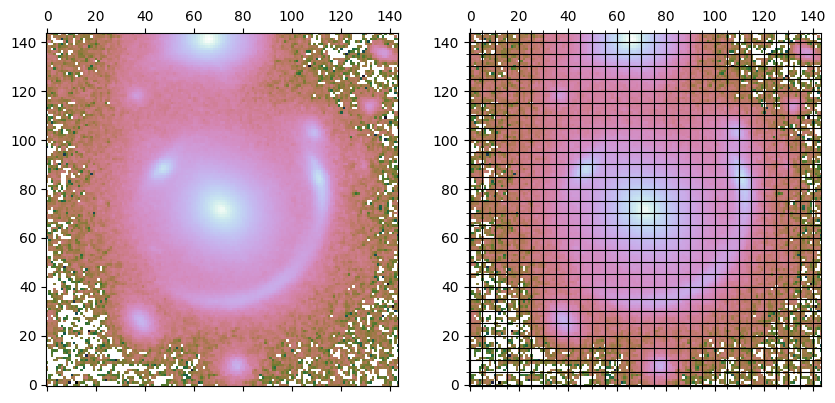

In [6]:
image_data = kwargs_data["image_data"]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.matshow(np.log10(image_data), origin="lower", cmap="cubehelix")
ax2.matshow(np.log10(image_data), origin="lower", cmap="cubehelix")
ax2.grid(which="both", color="black")
ax2.minorticks_on()
ax2.grid(which="minor", color="black")
plt.show()

## **A synopsis of the lens modeling history:**
<p>We assumed the arc spanning from around 2 o'clock position to around 8 o'clock position as the main component of the gravitational lensing arc with a smaller blob at around 10:30 as its counter image. Masking was done by covering non-lensing elements of the image.</p>
<p>The modeling was started with a model consisting of the following lens, source, and lens-light profiles:
    
    lens_model_list = ["EPL", "SHEAR"]
    source_model_list = ["SERSIC_ELLIPSE", "SHAPELETS"]
    lens_light_model_list = ["SERSIC_ELLIPSE"]

and the constraints: 
    
    joint_lens_with_light = [[0, 0, ['center_x', 'center_y', 'e1', 'e2']]]
    joint_source_with_source = [[0, 1, ["center_x", "center_y"]]]
</p>
<p>The reduced chi-squared value converged at around 1.20. It was saturated and was not improving any further. At that point, we realized that the constraints should not be applied and we should fit the model as flexibly as possible and thus remove the constraints. The PSO of the resulting new model was very promising, giving a value of around 0.99 and also a nice convergence of the MCMC chain, but the corner plot showed that it had two different maxima for quite a few of the 2-variable cases. This result and a realization that the model was overfitting the data due to the removal of the constraint `joint_source_with_source` convinced us to put the constraint back and refit the model. This newer model converged at around 1.05 in PSO and 0.93 in MCMC.</p>

## Making the Likelihood mask and plotting it:

/tmp/ipykernel_19/938716747.py:27: RuntimeWarning: invalid value encountered in log10
  image = np.log10(image_data)
/tmp/ipykernel_19/938716747.py:28: RuntimeWarning: divide by zero encountered in log10
  masked_image = np.log10(np.multiply(image_data, mask))
/tmp/ipykernel_19/938716747.py:28: RuntimeWarning: invalid value encountered in log10
  masked_image = np.log10(np.multiply(image_data, mask))


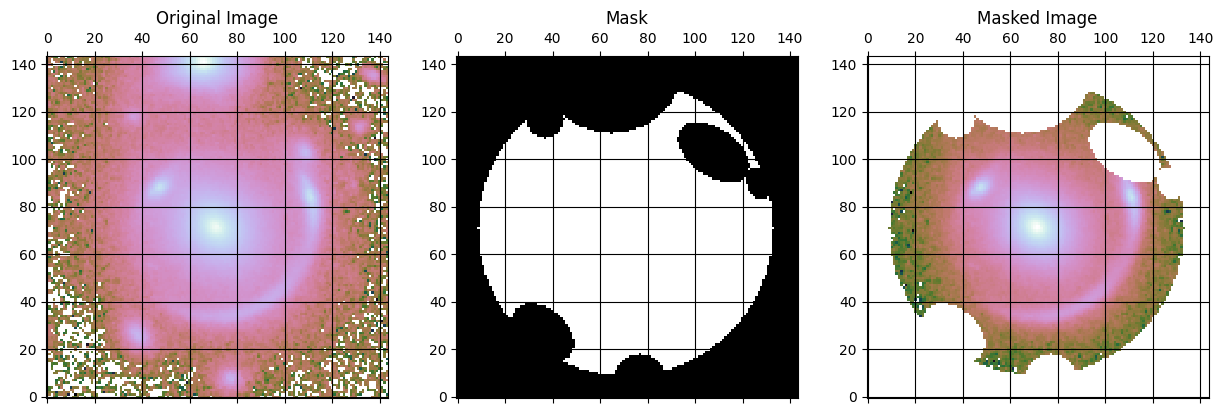

In [7]:
x_c, y_c = np.meshgrid(np.arange(144), np.arange(144))
mask = 1 - mk.mask_center_2d(71, 71, 62, x_c, y_c)

mask_params = [
    [65, 140, 30, 29, 0],
    [108, 103, 17, 10, np.pi * 145 / 180],
    [77, 7, 11, 11, 0],
    [36, 27, 15, 10, np.pi * 140 / 180],
    [37, 117, 8, 8, 0],
    [127, 90, 7, 5, np.pi * 115 / 180],
]

for mask_param in mask_params:
    mask *= 1 - mk.mask_ellipse(
        x_c,
        y_c,
        mask_param[0],
        mask_param[1],
        mask_param[2],
        mask_param[3],
        mask_param[4],
    )

mask[mask >= 1] = 1
mask[mask < 0] = 0

image = np.log10(image_data)
masked_image = np.log10(np.multiply(image_data, mask))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax1.matshow(image, origin="lower", cmap="cubehelix")
ax1.grid(which="both", color="black")
ax1.grid(which="minor", color="black")
ax1.title.set_text("Original Image")
ax2.matshow(mask, origin="lower", cmap="gray")
ax2.grid(which="both", color="black")
ax2.grid(which="minor", color="black")
ax2.title.set_text("Mask")
ax3.matshow(masked_image, origin="lower", cmap="cubehelix")
ax3.grid(which="both", color="black")
ax3.grid(which="minor", color="black")
ax3.title.set_text("Masked Image")

## Initial fitting with the created mask using `Lenstronomy`:

In [8]:
lens_model_list = ["EPL", "SHEAR"]
source_model_list = ["SERSIC_ELLIPSE", "SHAPELETS"]
lens_light_model_list = ["SERSIC_ELLIPSE"]

In [9]:
# lens galaxy's mass model
fixed_lens = []
kwargs_lens_init = [
    {
        "theta_E": 2.9246,
        "gamma": 2.0,
        "e1": -0.0020,
        "e2": 0.1737,
        "center_x": 0.2237,
        "center_y": 0.0966,
    },
    {
        "gamma1": -0.0008,
        "gamma2": 0.0940,
        "ra_0": 0.0,
        "dec_0": 0.0,
    },
]
kwargs_lens_sigma = []
kwargs_lower_lens = []
kwargs_upper_lens = []

fixed_lens.append({})

fixed_lens.append({"ra_0": 0.0, "dec_0": 0.0})

kwargs_lens_sigma.append(
    {
        "theta_E": 0.2,
        "gamma": 0.1,
        "e1": 0.05,
        "e2": 0.05,
        "center_x": 0.5,
        "center_y": 0.5,
    }
)

kwargs_lens_sigma.append({"gamma1": 0.05, "gamma2": 0.05})

kwargs_lower_lens.append(
    {
        "theta_E": 0.01,
        "gamma": 1.0,
        "e1": -0.5,
        "e2": -0.5,
        "center_x": -10,
        "center_y": -10,
    }
)

kwargs_lower_lens.append({"gamma1": -0.3, "gamma2": -0.3})

kwargs_upper_lens.append(
    {
        "theta_E": 10.0,
        "gamma": 3.0,
        "e1": 0.5,
        "e2": 0.5,
        "center_x": 10,
        "center_y": 10,
    }
)

kwargs_upper_lens.append({"gamma1": 0.3, "gamma2": 0.3})

lens_params = [
    kwargs_lens_init,
    kwargs_lens_sigma,
    fixed_lens,
    kwargs_lower_lens,
    kwargs_upper_lens,
]


# lens galaxy's light model
fixed_lens_light = []
kwargs_lens_light_init = [
    {
        "amp": 1,
        "R_sersic": 1.1981,
        "n_sersic": 4.0,
        "e1": 0.0271,
        "e2": 0.0964,
        "center_x": 0.0995,
        "center_y": -0.0796,
    }
]
kwargs_lens_light_sigma = []
kwargs_lower_lens_light = []
kwargs_upper_lens_light = []

fixed_lens_light.append({"n_sersic": 4.0})

kwargs_lens_light_sigma.append(
    {
        "n_sersic": 1,
        "R_sersic": 0.3,
        "e1": 0.05,
        "e2": 0.05,
        "center_x": 0.1,
        "center_y": 0.1,
        "amp": 10,
    }
)

kwargs_lower_lens_light.append(
    {
        "e1": -0.5,
        "e2": -0.5,
        "R_sersic": 0.001,
        "n_sersic": 0.5,
        "center_x": -10,
        "center_y": -10,
        "amp": 0,
    }
)

kwargs_upper_lens_light.append(
    {
        "e1": 0.5,
        "e2": 0.5,
        "R_sersic": 10,
        "n_sersic": 5.0,
        "center_x": 10,
        "center_y": 10,
        "amp": 100,
    }
)

# joint_lens_with_light = [[0, 0, ['center_x', 'center_y', 'e1', 'e2']]]

lens_light_params = [
    kwargs_lens_light_init,
    kwargs_lens_light_sigma,
    fixed_lens_light,
    kwargs_lower_lens_light,
    kwargs_upper_lens_light,
]


# source galaxy's light model
fixed_source = []
kwargs_source_init = [
    {
        "amp": 1,
        "R_sersic": 0.2305,
        "n_sersic": 1.0,
        "e1": -0.0571,
        "e2": -0.2318,
        "center_x": 0.0020,
        "center_y": -0.0030,
    },
    {
        "amp": 1,
        "n_max": 10,
        "beta": 0.0422,
        "center_x": -0.26484686266794166,
        "center_y": -0.21785501426367085,
    },
]
kwargs_source_sigma = []
kwargs_lower_source = []
kwargs_upper_source = []

fixed_source.append({"n_sersic": 1.0})

fixed_source.append({"n_max": 10})

kwargs_source_sigma.append(
    {
        "n_sersic": 0.5,
        "R_sersic": 0.1,
        "e1": 0.05,
        "e2": 0.05,
        "center_x": 0.2,
        "center_y": 0.2,
        "amp": 10,
    }
)

kwargs_source_sigma.append({"beta": 0.1, "center_x": 0.1, "center_y": 0.1})

kwargs_lower_source.append(
    {
        "e1": -0.5,
        "e2": -0.5,
        "R_sersic": 0.001,
        "n_sersic": 0.5,
        "center_x": -10,
        "center_y": -10,
        "amp": 0,
    }
)

kwargs_lower_source.append({"beta": 0.01, "center_x": -10, "center_y": -10})

kwargs_upper_source.append(
    {
        "e1": 0.5,
        "e2": 0.5,
        "R_sersic": 0.4,
        "n_sersic": 5.0,
        "center_x": 10,
        "center_y": 10,
        "amp": 100,
    }
)

kwargs_upper_source.append({"beta": 5, "center_x": 10, "center_y": 10})

joint_source_with_source = [[0, 1, ["center_x", "center_y"]]]

source_params = [
    kwargs_source_init,
    kwargs_source_sigma,
    fixed_source,
    kwargs_lower_source,
    kwargs_upper_source,
]

# combining all the above specification in the `kwargs_params` dictionary
kwargs_params = {
    "lens_model": lens_params,
    "source_model": source_params,
    "lens_light_model": lens_light_params,
}

kwargs_constraints = {  #'joint_lens_with_light': joint_lens_with_light,
    "joint_source_with_source": joint_source_with_source
}

In [10]:
kwargs_likelihood = {"check_bounds": True, "image_likelihood_mask_list": [mask]}

kwargs_numerics = {"supersampling_factor": 3, "supersampling_convolution": False}

In [11]:
kwargs_model = {
    "lens_model_list": lens_model_list,
    "source_light_model_list": source_model_list,
    "lens_light_model_list": lens_light_model_list,
}

multi_band_list = [[kwargs_data, kwargs_psf, kwargs_numerics]]

kwargs_data_joint = {
    "multi_band_list": multi_band_list,
    "multi_band_type": "single-band"
    # 'multi-linear': every imaging band has independent
    # solutions of the surface brightness,
    # 'joint-linear': there is one joint solution of the linear
    # coefficients demanded across the bands.
}

## Fitting the PSO sequence and saving the resulting joblib file:

In [12]:
fitting_seq = FittingSequence(
    kwargs_data_joint,
    kwargs_model,
    kwargs_constraints,
    kwargs_likelihood,
    kwargs_params,
)

fitting_kwargs_list = [
    ["update_settings", {"lens_add_fixed": [[0, ["gamma"]]]}],
    ["PSO", {"sigma_scale": 1.0, "n_particles": 200, "n_iterations": 200}],
    ["update_settings", {"lens_remove_fixed": [[0, ["gamma"]]]}],
]
chain_list = fitting_seq.fit_sequence(fitting_kwargs_list)
kwargs_result = fitting_seq.best_fit(bijective=False)

fit_output = chain_list
multi_band_list_out = fitting_seq.multi_band_list
kwargs_fixed_out = fitting_seq.kwargs_fixed

init_samples = None  # can be not `None` for MCMC

input = [
    fitting_kwargs_list,
    multi_band_list,
    kwargs_model,
    kwargs_constraints,
    kwargs_likelihood,
    kwargs_params,
    init_samples,
]
output = [kwargs_result, multi_band_list_out, fit_output, kwargs_fixed_out]

output_path = "./DESIJ1018-0121_pso_output.joblib"

with open(output_path, "wb") as f:
    joblib.dump([input, output], f, compress=True)

print(kwargs_result)

Computing the PSO ...
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
Max iteration reached! Stopping.
-1.0720675851889578 reduced X^2 of best position
-5285.829228774157 log likelihood
9861 effective number of data points
[{'theta_E': 2.853877232501237, 'gamma': 2.0, 'e1': -0.03223491156690539, 'e2': 0.17134767477225502, 'center_x': 0.16909807499994806, 'center_y': 0.03880474593551183}, {'gamma1': -0.008315186934794027, 'gamma2': 0.0009014576170116686, 'ra_0': 0.0, 'dec_0': 0.0}] lens result
[{'amp': 1, 'R_sersic': 0.3759940553356843, 'n_sersic': 1.0, 'e1': -0.0651199687459588, 'e2': -0.11329941957393821, 'center_x': -0.2538055837709215, 'center_y': -0.15704338892442496}, {'amp': 1, 'n_max': 10, 'beta': 0.08348653116653894, 'center_x': -0.2538055837709215, 'center_y': -0.15704338892442496}] source result
[{'amp': 1, 'R_sersic': 1.2471661725981402, 'n_sersic': 4.0, 'e1': 0.02827765924466749, 'e2': 0.10333695688669055, 'center_x': 0.1038609594010915, 'center_y': -

## Visualization of the PSO fit:

-1.0627986700690524 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.0627986700690484


/opt/conda/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:63: RuntimeWarning: divide by zero encountered in log10
  log_model = np.log10(model)
/opt/conda/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:148: RuntimeWarning: invalid value encountered in log10
  np.log10(self._data),
/opt/conda/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:211: RuntimeWarning: divide by zero encountered in log10
  np.log10(self._model),
/tmp/ipykernel_19/519960374.py:20: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


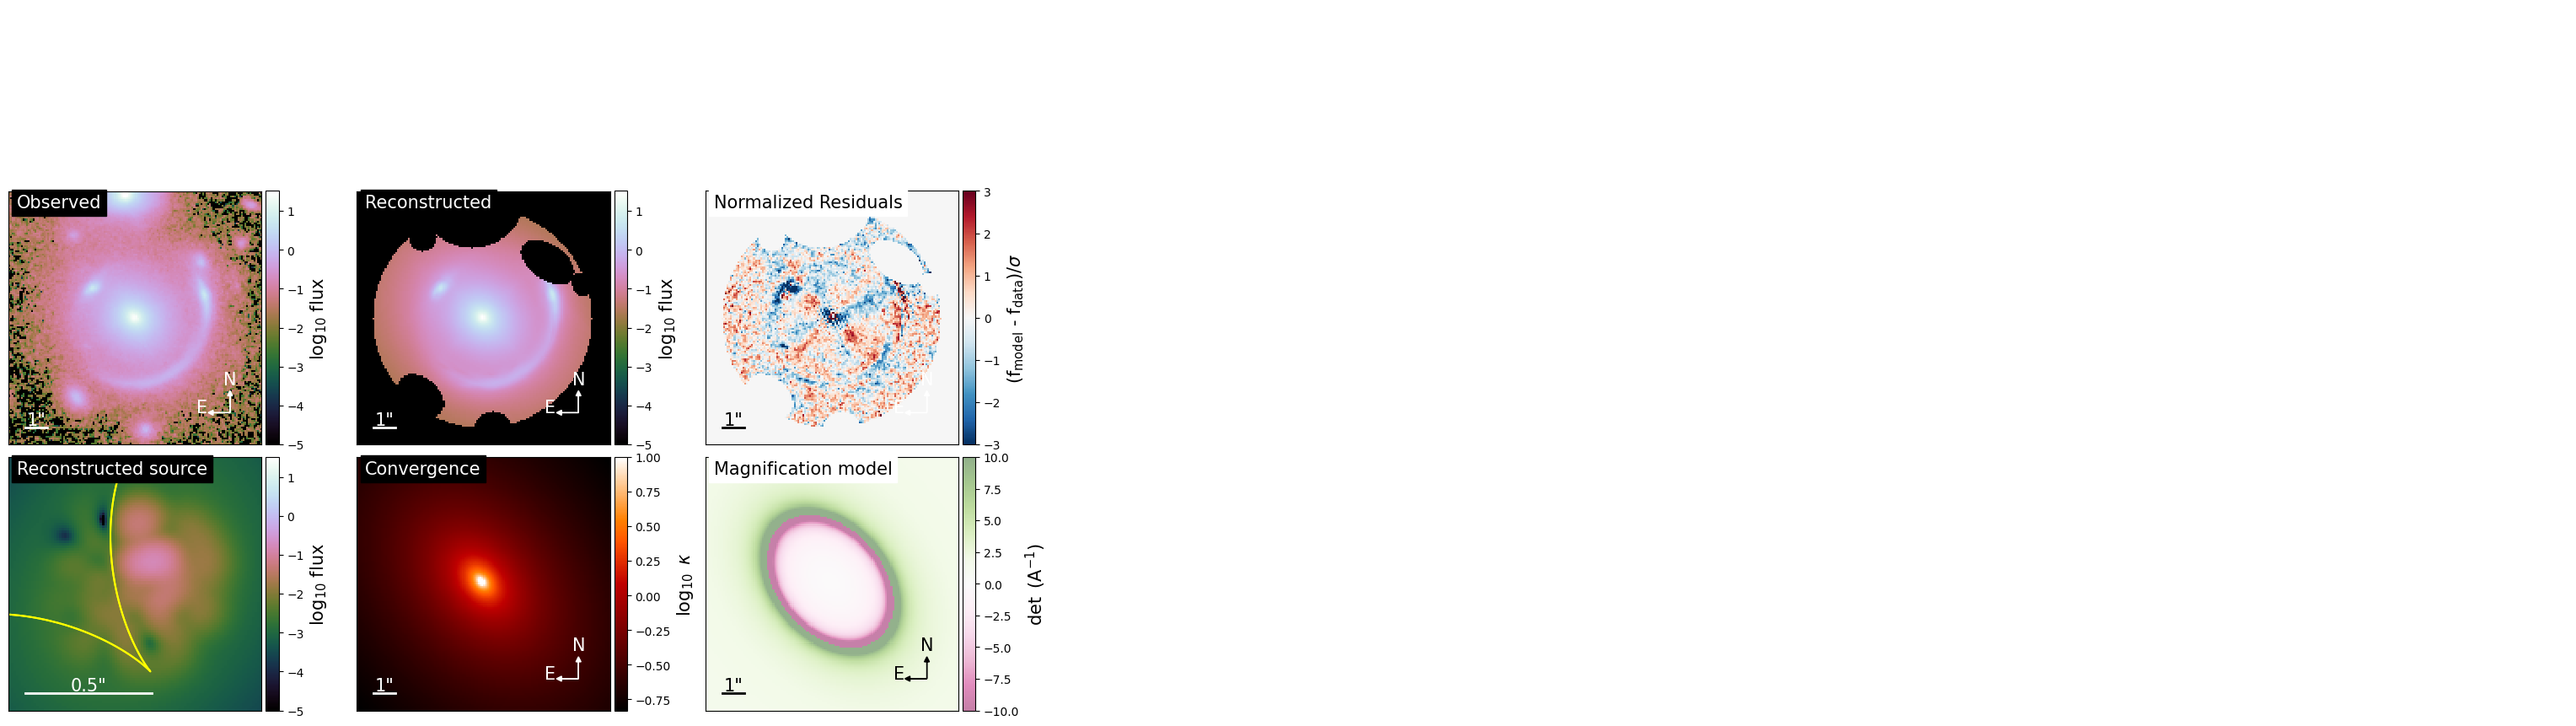

In [13]:
model_plot = ModelPlot(
    multi_band_list,
    kwargs_model,
    kwargs_result,
    arrow_size=0.02,
    cmap_string="cubehelix",
    image_likelihood_mask_list=kwargs_likelihood["image_likelihood_mask_list"],
)

f, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=False, sharey=False)

model_plot.data_plot(ax=axes[0, 0])
model_plot.model_plot(ax=axes[0, 1])
model_plot.normalized_residual_plot(ax=axes[0, 2], v_min=-3, v_max=3, cmap="RdBu_r")
model_plot.source_plot(
    ax=axes[1, 0], deltaPix_source=0.01, numPix=100, with_caustics=True, scale_size=0.5
)
model_plot.convergence_plot(ax=axes[1, 1], v_max=1, cmap="gist_heat")
model_plot.magnification_plot(ax=axes[1, 2], cmap="PiYG")
f.tight_layout()
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.0, hspace=0.05)
plt.show()

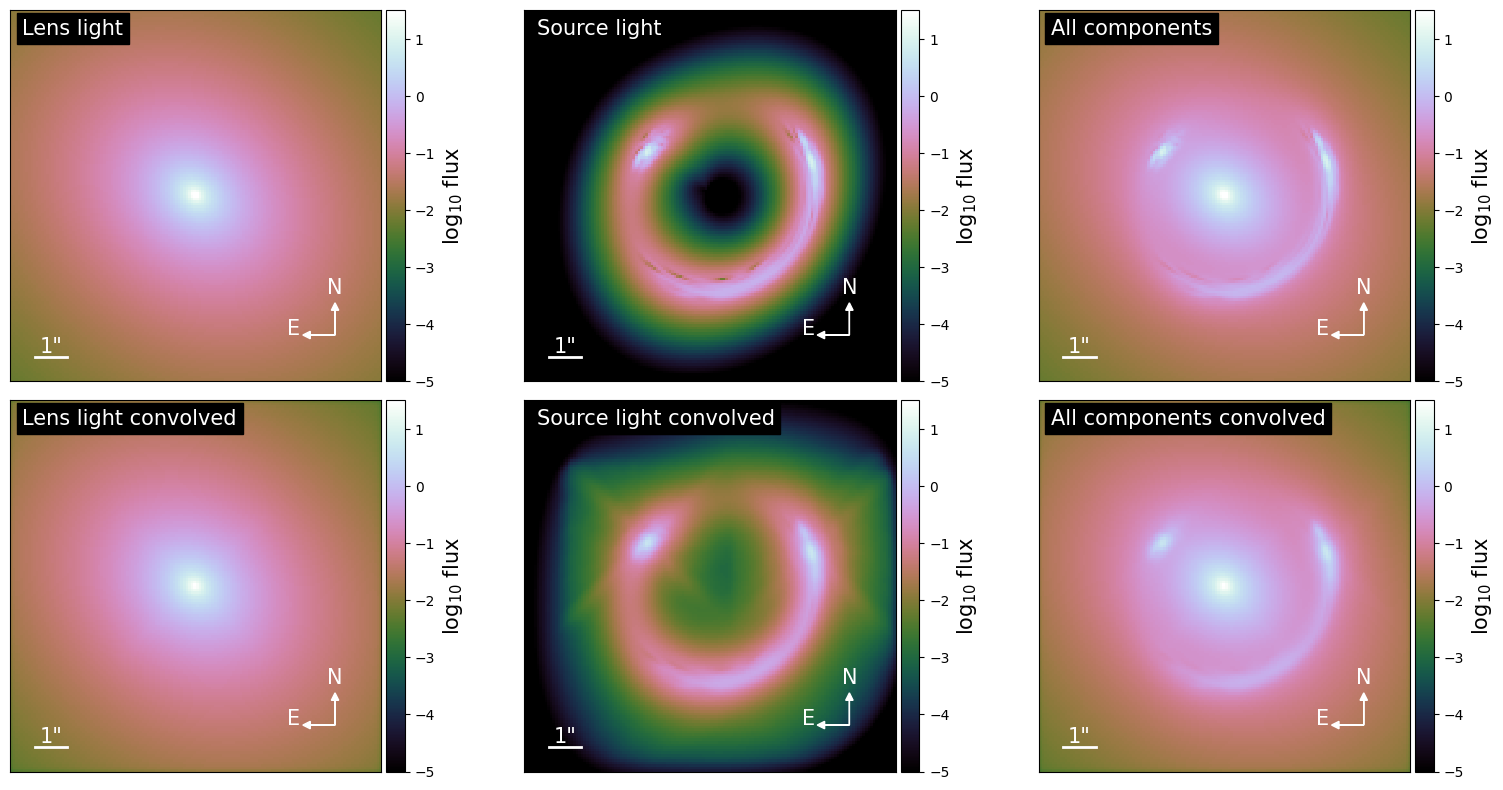

{'kwargs_lens': [{'theta_E': 2.853877232501237, 'gamma': 2.0, 'e1': -0.03223491156690539, 'e2': 0.17134767477225502, 'center_x': 0.16909807499994806, 'center_y': 0.03880474593551183}, {'gamma1': -0.008315186934794027, 'gamma2': 0.0009014576170116686, 'ra_0': 0.0, 'dec_0': 0.0}], 'kwargs_source': [{'amp': 17.86025157014496, 'R_sersic': 0.3759940553356843, 'n_sersic': 1.0, 'e1': -0.0651199687459588, 'e2': -0.11329941957393821, 'center_x': -0.2538055837709215, 'center_y': -0.15704338892442496}, {'amp': array([ 1.09888662e+03, -8.54156811e+02,  8.21909140e+02,  3.63003382e+02,
       -5.86724928e+02,  5.92102335e+02, -7.42670594e+01,  2.63638488e+01,
       -3.79810196e+02,  3.02998873e+01,  5.29767420e+01,  9.60907493e+01,
        9.08726144e+01,  1.13696075e+00, -5.96085962e+01, -4.01359157e+01,
        7.37914044e-01,  3.54878581e+01, -5.56332440e+01,  1.70958842e+02,
        1.08873744e+02,  6.50724535e+01, -3.37472569e+01, -1.58305287e+01,
       -2.87779493e+00, -8.24679650e+01,  2.4

In [14]:
f, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=False, sharey=False)

model_plot.decomposition_plot(
    ax=axes[0, 0], text="Lens light", lens_light_add=True, unconvolved=True
)
model_plot.decomposition_plot(
    ax=axes[1, 0], text="Lens light convolved", lens_light_add=True
)
model_plot.decomposition_plot(
    ax=axes[0, 1], text="Source light", source_add=True, unconvolved=True
)
model_plot.decomposition_plot(
    ax=axes[1, 1], text="Source light convolved", source_add=True
)
model_plot.decomposition_plot(
    ax=axes[0, 2],
    text="All components",
    source_add=True,
    lens_light_add=True,
    unconvolved=True,
)
model_plot.decomposition_plot(
    ax=axes[1, 2],
    text="All components convolved",
    source_add=True,
    lens_light_add=True,
    point_source_add=True,
)
f.tight_layout()
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.0, hspace=0.05)
plt.show()
print(kwargs_result)

## MCMC-run:

In [1]:
!pip install corner
!pip install lenstronomy
!pip install emcee

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
  Obtaining dependency information for configparser from https://files.pythonhosted.org/packages/81/a3/0e5ed11da4b7770c15f6f319abf053f46b5a06c7d4273c48469b7899bd89/configparser-6.0.0-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.6 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - \ | / done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... - done
  Created wheel for lenstronomy: filename=lenstronomy-1.11.5-py3-none-any.whl size=1139060 sha256=d74106025332bb72aa77328cdd2313bd39b2268a8c8c840f234a4894111c615a
  Stored in directory: /root/.cache/pip/wheels/78/dd/d9/bbdd80cec79b57ec559b7183476b0e8802a2c029e312d05b0f
  Created wheel for schwimmbad: filename=schwimmbad-0.3.2-py3-none-any.whl size=15729 sha256=ed708ed306fad036947f3ecd9a60e8c86da0905e3365055bb

In [3]:
%matplotlib inline

In [4]:
with h5py.File(
    "/kaggle/input/lens-model-desij1018-0121/DESIJ1018-0121_F140W.h5", "r"
) as f:
    kwargs_data = {}
    for key in f:
        kwargs_data[key] = f[key][()]

kwargs_data

{'background_rms': 0.018610074701766573,
 'dec_at_xy_0': -5.799999999999994,
 'exposure_time': array([[486.32956, 387.50772, 555.4221 , ..., 561.57306, 436.89725,
         453.8047 ],
        [525.3609 , 455.32626, 433.4547 , ..., 467.7759 , 393.7413 ,
         575.8005 ],
        [406.4474 , 553.6718 , 442.7201 , ..., 439.1787 , 455.65027,
         465.92584],
        ...,
        [424.9911 , 470.85703, 480.29526, ..., 431.6869 , 500.74237,
         476.34906],
        [416.17792, 491.75076, 384.38663, ..., 364.7395 , 248.40552,
         394.68134],
        [461.31955, 487.39075, 457.4765 , ..., 516.8107 , 438.08667,
         375.04907]], dtype=float32),
 'image_data': array([[ 0.01961958, -0.00048153, -0.01787547, ..., -0.01659699,
         -0.00921571,  0.01057982],
        [ 0.02892776,  0.01651465, -0.00482212, ..., -0.00829422,
         -0.00578246,  0.0005834 ],
        [ 0.01247546,  0.00889849,  0.00884483, ...,  0.01536562,
          0.0021972 , -0.01391137],
        ...,
   

In [5]:
with h5py.File("/kaggle/input/lens-model-desij1018-0121/psf_F140W.h5", "r") as f:
    kwargs_psf = {}
    for key in f:
        kwargs_psf[key] = f[key][()]

kwargs_psf["psf_type"] = "PIXEL"

kwargs_psf

{'kernel_point_source': array([[5.7422681e-06, 4.5087054e-06, 2.4900439e-06, ..., 1.8486933e-06,
         3.2385867e-06, 4.4331632e-06],
        [3.9503216e-06, 9.9817180e-06, 6.5966469e-06, ..., 3.9997908e-06,
         6.6143798e-06, 4.1430776e-06],
        [2.9697005e-06, 5.5563592e-06, 1.2795975e-05, ..., 7.8115263e-06,
         5.1404800e-06, 1.7530243e-06],
        ...,
        [1.6921831e-06, 3.7347368e-06, 7.6415899e-06, ..., 1.1465157e-05,
         5.3933368e-06, 1.6360833e-06],
        [2.8819463e-06, 6.2348781e-06, 4.7564718e-06, ..., 4.5906190e-06,
         8.7221979e-06, 3.7005334e-06],
        [3.7170516e-06, 3.6243027e-06, 1.6518559e-06, ..., 2.0127884e-06,
         3.2246478e-06, 5.1252514e-06]], dtype=float32),
 'psf_type': 'PIXEL'}

/tmp/ipykernel_19/488582926.py:4: RuntimeWarning: invalid value encountered in log10
  ax1.matshow(np.log10(image_data), origin="lower", cmap="cubehelix")
/tmp/ipykernel_19/488582926.py:5: RuntimeWarning: invalid value encountered in log10
  ax2.matshow(np.log10(image_data), origin="lower", cmap="cubehelix")


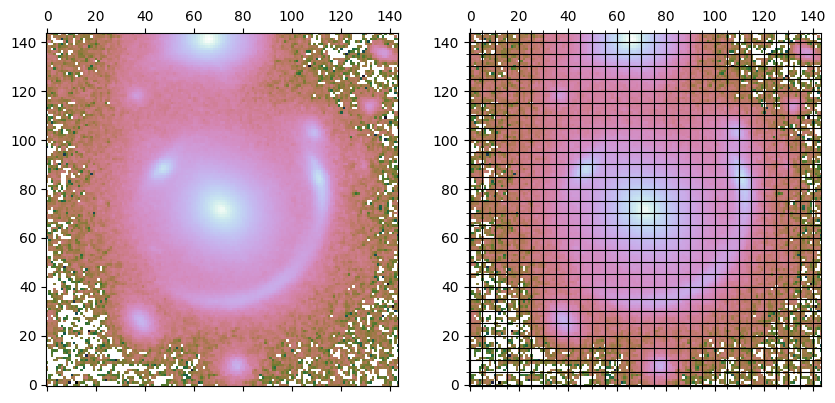

In [6]:
image_data = kwargs_data["image_data"]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.matshow(np.log10(image_data), origin="lower", cmap="cubehelix")
ax2.matshow(np.log10(image_data), origin="lower", cmap="cubehelix")
ax2.grid(which="both", color="black")
ax2.minorticks_on()
ax2.grid(which="minor", color="black")
plt.show()

/tmp/ipykernel_19/1724106519.py:29: RuntimeWarning: invalid value encountered in log10
  image = np.log10(image_data)
/tmp/ipykernel_19/1724106519.py:30: RuntimeWarning: divide by zero encountered in log10
  masked_image = np.log10(np.multiply(image_data, mask))
/tmp/ipykernel_19/1724106519.py:30: RuntimeWarning: invalid value encountered in log10
  masked_image = np.log10(np.multiply(image_data, mask))


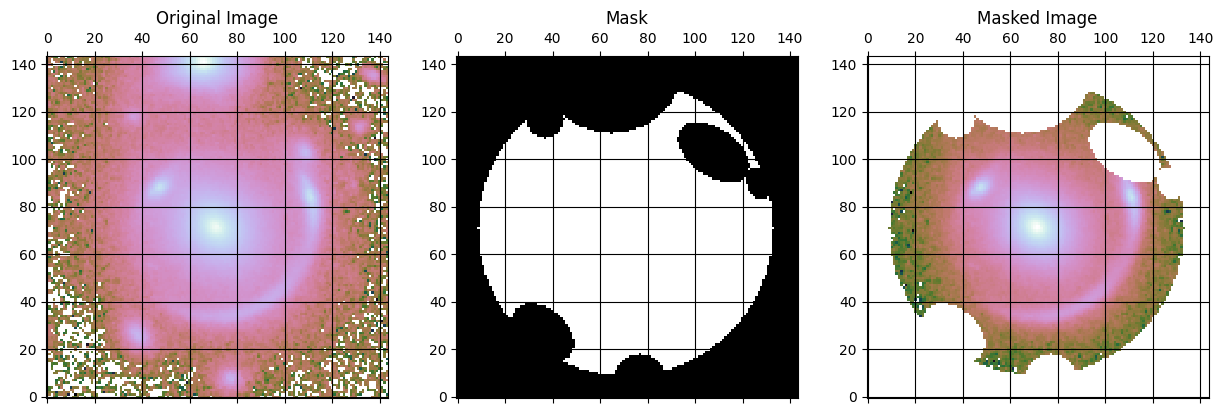

In [7]:
x_c, y_c = np.meshgrid(np.arange(144), np.arange(144))
mask = 1 - mk.mask_center_2d(71, 71, 62, x_c, y_c)

mask_params = [
    [65, 140, 30, 29, 0],
    # [55, 45, 2, 2, 0],
    [108, 103, 17, 10, np.pi * 145 / 180],
    [77, 7, 11, 11, 0],
    [36, 27, 15, 10, np.pi * 140 / 180],
    [37, 117, 8, 8, 0],
    [127, 90, 7, 5, np.pi * 115 / 180],
    # [47, 88, 10, 5, np.pi*45/180]
]

for mask_param in mask_params:
    mask *= 1 - mk.mask_ellipse(
        x_c,
        y_c,
        mask_param[0],
        mask_param[1],
        mask_param[2],
        mask_param[3],
        mask_param[4],
    )

mask[mask >= 1] = 1
mask[mask < 0] = 0

image = np.log10(image_data)
masked_image = np.log10(np.multiply(image_data, mask))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax1.matshow(image, origin="lower", cmap="cubehelix")
ax1.grid(which="both", color="black")
ax1.grid(which="minor", color="black")
ax1.title.set_text("Original Image")
ax2.matshow(mask, origin="lower", cmap="gray")
ax2.grid(which="both", color="black")
ax2.grid(which="minor", color="black")
ax2.title.set_text("Mask")
ax3.matshow(masked_image, origin="lower", cmap="cubehelix")
ax3.grid(which="both", color="black")
ax3.grid(which="minor", color="black")
ax3.title.set_text("Masked Image")

In [8]:
lens_model_list = ["EPL", "SHEAR"]
source_model_list = ["SERSIC_ELLIPSE", "SHAPELETS"]
lens_light_model_list = ["SERSIC_ELLIPSE"]

In [9]:
# lens galaxy's mass model
fixed_lens = []
kwargs_lens_init = [
    {
        "theta_E": 2.916451625701498,
        "gamma": 1.4830259826498207,
        "e1": -0.0029891856002007234,
        "e2": 0.15855565612419642,
        "center_x": 0.19311527579056695,
        "center_y": 0.07783448759004875,
    },
    {
        "gamma1": -0.0021410330549292023,
        "gamma2": 0.08000856364590217,
        "ra_0": 0.0,
        "dec_0": 0.0,
    },
]
kwargs_lens_sigma = []
kwargs_lower_lens = []
kwargs_upper_lens = []

fixed_lens.append({})

fixed_lens.append({"ra_0": 0.0, "dec_0": 0.0})

kwargs_lens_sigma.append(
    {
        "theta_E": 0.2,
        "gamma": 0.1,
        "e1": 0.05,
        "e2": 0.05,
        "center_x": 0.5,
        "center_y": 0.5,
    }
)

kwargs_lens_sigma.append({"gamma1": 0.05, "gamma2": 0.05})

kwargs_lower_lens.append(
    {
        "theta_E": 0.01,
        "gamma": 1.0,
        "e1": -0.5,
        "e2": -0.5,
        "center_x": -10,
        "center_y": -10,
    }
)

kwargs_lower_lens.append({"gamma1": -0.3, "gamma2": -0.3})

kwargs_upper_lens.append(
    {
        "theta_E": 10.0,
        "gamma": 3.0,
        "e1": 0.5,
        "e2": 0.5,
        "center_x": 10,
        "center_y": 10,
    }
)

kwargs_upper_lens.append({"gamma1": 0.3, "gamma2": 0.3})

lens_params = [
    kwargs_lens_init,
    kwargs_lens_sigma,
    fixed_lens,
    kwargs_lower_lens,
    kwargs_upper_lens,
]


# lens galaxy's light model
fixed_lens_light = []
kwargs_lens_light_init = [
    {
        "amp": 1,
        "R_sersic": 1.2298357534804112,
        "n_sersic": 4.0,
        "e1": 0.02660788957251795,
        "e2": 0.09866345297778979,
        "center_x": 0.10226280014400425,
        "center_y": -0.07775070577217343,
    }
]
kwargs_lens_light_sigma = []
kwargs_lower_lens_light = []
kwargs_upper_lens_light = []

fixed_lens_light.append({"n_sersic": 4.0})

kwargs_lens_light_sigma.append(
    {
        "n_sersic": 1,
        "R_sersic": 0.3,
        "e1": 0.05,
        "e2": 0.05,
        "center_x": 0.1,
        "center_y": 0.1,
        "amp": 10,
    }
)

kwargs_lower_lens_light.append(
    {
        "e1": -0.5,
        "e2": -0.5,
        "R_sersic": 0.001,
        "n_sersic": 0.5,
        "center_x": -10,
        "center_y": -10,
        "amp": 0,
    }
)

kwargs_upper_lens_light.append(
    {
        "e1": 0.5,
        "e2": 0.5,
        "R_sersic": 10,
        "n_sersic": 5.0,
        "center_x": 10,
        "center_y": 10,
        "amp": 100,
    }
)

# joint_lens_with_light = [[0, 0, ['center_x', 'center_y', 'e1', 'e2']]]

lens_light_params = [
    kwargs_lens_light_init,
    kwargs_lens_light_sigma,
    fixed_lens_light,
    kwargs_lower_lens_light,
    kwargs_upper_lens_light,
]


# source galaxy's light model
fixed_source = []
kwargs_source_init = [
    {
        "amp": 1,
        "R_sersic": 0.21941711278563672,
        "n_sersic": 1.0,
        "e1": -0.05269312428803557,
        "e2": -0.19723104338609979,
        "center_x": -0.022097661689875557,
        "center_y": -0.021241512072954508,
    },
    {
        "amp": 1,
        "n_max": 10,
        "beta": 0.04180982400555344,
        "center_x": -0.022097661689875557,
        "center_y": -0.021241512072954508,
    },
]
kwargs_source_sigma = []
kwargs_lower_source = []
kwargs_upper_source = []

fixed_source.append({"n_sersic": 1.0})

fixed_source.append({"n_max": 10})

kwargs_source_sigma.append(
    {
        "n_sersic": 0.5,
        "R_sersic": 0.1,
        "e1": 0.05,
        "e2": 0.05,
        "center_x": 0.2,
        "center_y": 0.2,
        "amp": 10,
    }
)

kwargs_source_sigma.append({"beta": 0.1, "center_x": 0.1, "center_y": 0.1})

kwargs_lower_source.append(
    {
        "e1": -0.5,
        "e2": -0.5,
        "R_sersic": 0.001,
        "n_sersic": 0.5,
        "center_x": -10,
        "center_y": -10,
        "amp": 0,
    }
)

kwargs_lower_source.append({"beta": 0.01, "center_x": -10, "center_y": -10})

kwargs_upper_source.append(
    {
        "e1": 0.5,
        "e2": 0.5,
        "R_sersic": 0.4,
        "n_sersic": 5.0,
        "center_x": 10,
        "center_y": 10,
        "amp": 100,
    }
)

kwargs_upper_source.append({"beta": 5, "center_x": 10, "center_y": 10})

joint_source_with_source = [[0, 1, ["center_x", "center_y"]]]

source_params = [
    kwargs_source_init,
    kwargs_source_sigma,
    fixed_source,
    kwargs_lower_source,
    kwargs_upper_source,
]

# combining all the above specification in the `kwargs_params` dictionary
kwargs_params = {
    "lens_model": lens_params,
    "source_model": source_params,
    "lens_light_model": lens_light_params,
}

kwargs_constraints = {  #'joint_lens_with_light': joint_lens_with_light,
    "joint_source_with_source": joint_source_with_source
}

In [10]:
kwargs_likelihood = {"check_bounds": True, "image_likelihood_mask_list": [mask]}

kwargs_numerics = {"supersampling_factor": 3, "supersampling_convolution": False}

In [11]:
kwargs_model = {
    "lens_model_list": lens_model_list,
    "source_light_model_list": source_model_list,
    "lens_light_model_list": lens_light_model_list,
}

multi_band_list = [[kwargs_data, kwargs_psf, kwargs_numerics]]

kwargs_data_joint = {
    "multi_band_list": multi_band_list,
    "multi_band_type": "single-band"
    # 'multi-linear': every imaging band has independent
    # solutions of the surface brightness,
    # 'joint-linear': there is one joint solution of the linear
    # coefficients demanded across the bands.
}

In [12]:
# Define the local path to save the backend file:

fitting_seq = FittingSequence(
    kwargs_data_joint,
    kwargs_model,
    kwargs_constraints,
    kwargs_likelihood,
    kwargs_params,
)

local_backend_path = "mcmc_backend.h5"

fitting_kwargs_list_mcmc = [
    [
        "MCMC",
        {
            "n_burn": 0,
            "n_run": 1000,
            "n_walkers": 100,
            "sigma_scale": 0.1,
            "threadCount": 3,
            "backend_filename": local_backend_path,
            "start_from_backend": False,
        },
    ],
]

chain_list_mcmc = fitting_seq.fit_sequence(fitting_kwargs_list_mcmc)
kwargs_result_mcmc = fitting_seq.best_fit()

100%|██████████| 1000/1000 [6:44:50<00:00, 24.29s/it]

Computing the MCMC...
Number of walkers =  100
Burn-in iterations:  0
Sampling iterations (in current run): 1000
24313.354122400284 time taken for MCMC sampling


## Trace plot of the MCMC-run:

/tmp/ipykernel_19/2560501189.py:16: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if not samples_mcmc == []:


N_step: 1000, N_walkers: 100, N_params: 19
theta_E_lens0 2.9153 ± 0.0024
gamma_lens0 1.4861 ± 0.0137
e1_lens0 -0.0027 ± 0.0015
e2_lens0 0.1581 ± 0.0027
center_x_lens0 0.1933 ± 0.0020
center_y_lens0 0.0782 ± 0.0015
gamma1_lens1 -0.0019 ± 0.0012
gamma2_lens1 0.0791 ± 0.0023
R_sersic_source_light0 0.2202 ± 0.0104
e1_source_light0 -0.0560 ± 0.0096
e2_source_light0 -0.2019 ± 0.0126
center_x_source_light0 -0.0237 ± 0.0064
center_y_source_light0 -0.0209 ± 0.0029
beta_source_light1 0.0425 ± 0.0015
R_sersic_lens_light0 1.2286 ± 0.0044
e1_lens_light0 0.0273 ± 0.0008
e2_lens_light0 0.0985 ± 0.0010
center_x_lens_light0 0.1024 ± 0.0004
center_y_lens_light0 -0.0777 ± 0.0004


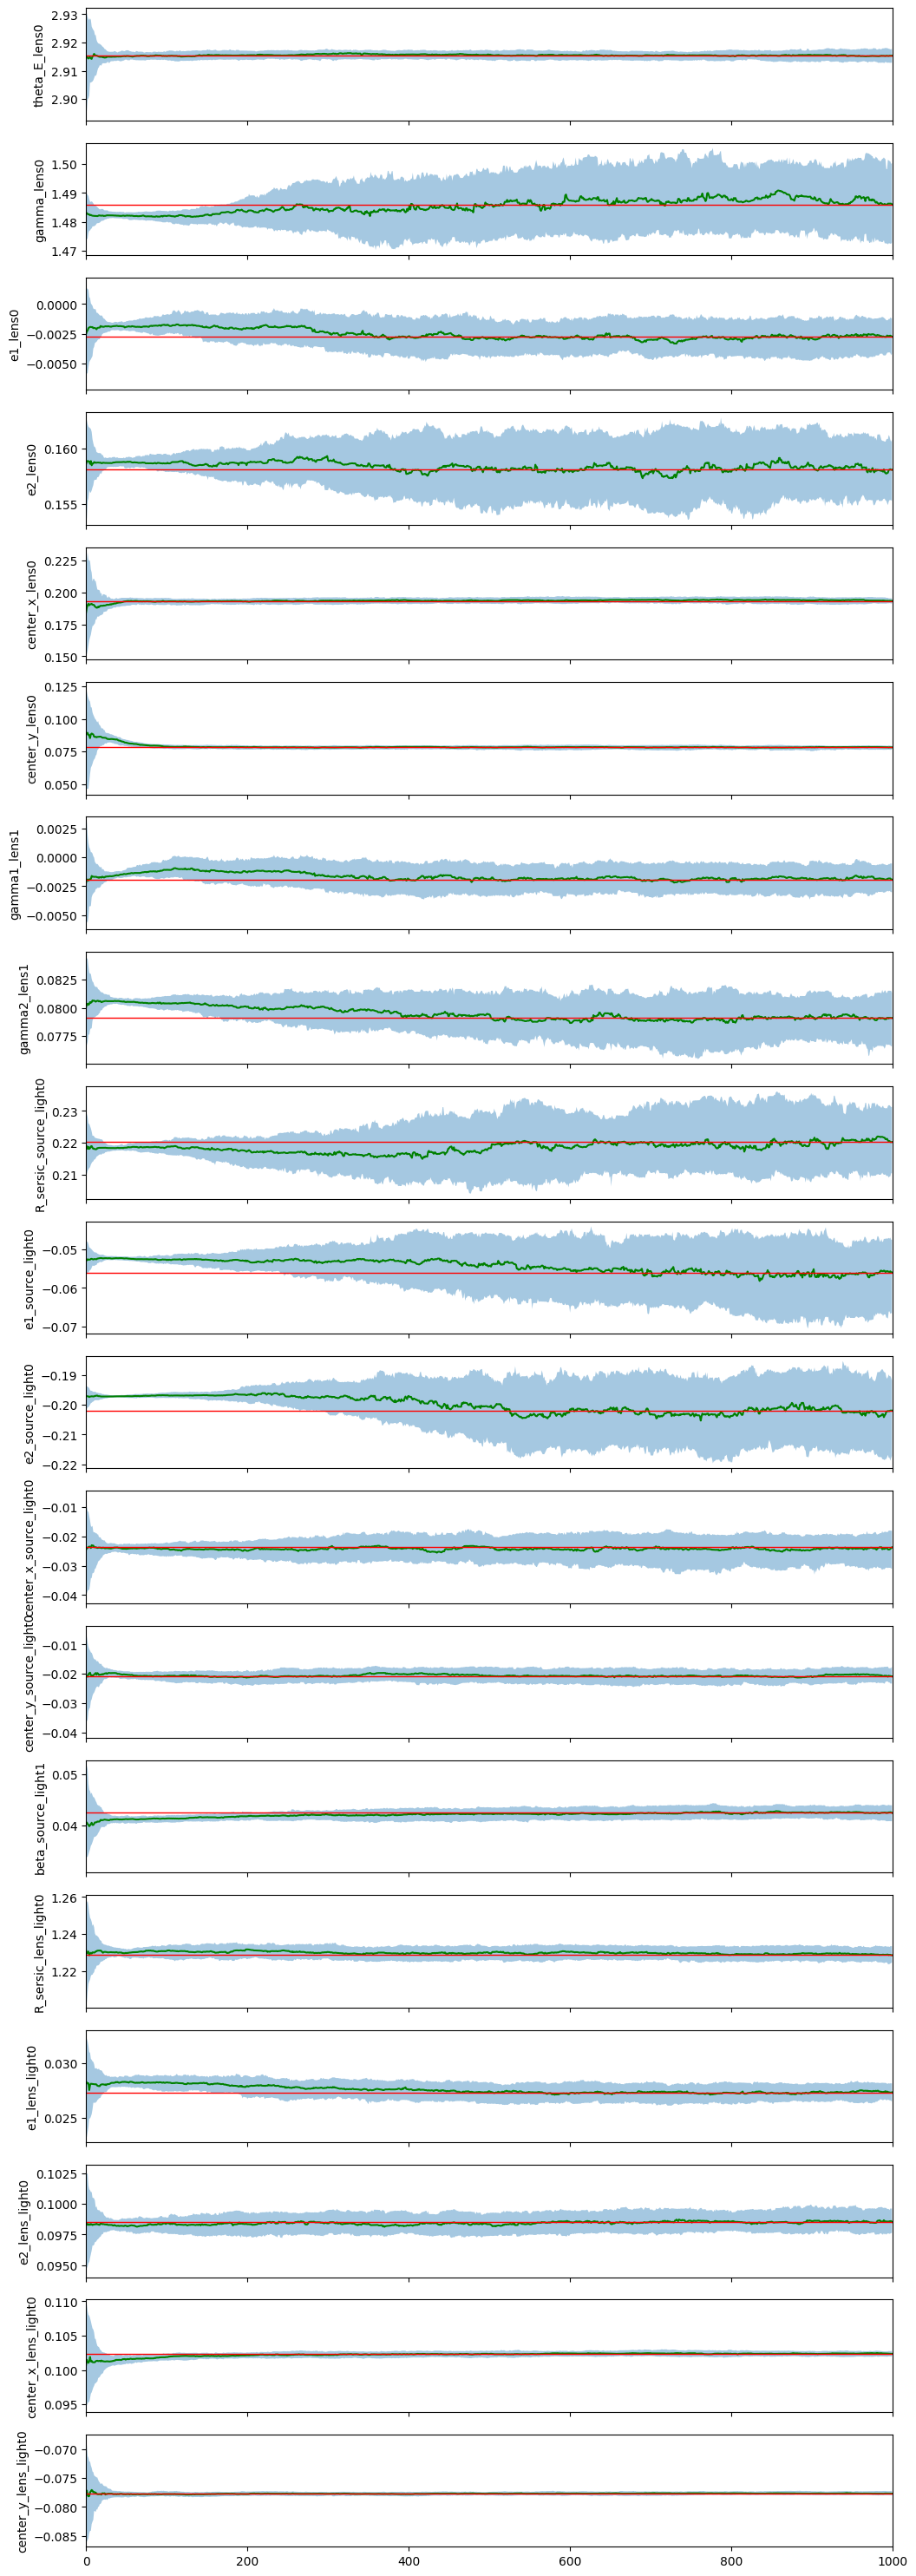

In [13]:
samples_mcmc = []

if chain_list_mcmc[-1][0] != "PSO":
    # if MCMC chain was broken in the chunks,
    # we join the chunks to make the full chain
    mcmc_repeat = 1

    for k in range(len(chain_list_mcmc) - mcmc_repeat, len(chain_list_mcmc)):
        if samples_mcmc == []:
            samples_mcmc = chain_list_mcmc[k][1]
        else:
            samples_mcmc = np.vstack((samples_mcmc, chain_list_mcmc[k][1]))

        param_mcmc = chain_list_mcmc[k][2]

if not samples_mcmc == []:
    n_params = samples_mcmc.shape[1]
    n_walkers = 100
    n_step = 1000
    n_burn = 0

    print("N_step: {}, N_walkers: {}, N_params: {}".format(n_step, n_walkers, n_params))

    chain = np.empty((n_walkers, n_step, n_params))

    for i in range(n_params):
        samples = samples_mcmc[:, i]
        reshaped_samples = samples.reshape((n_walkers, n_step), order="F")
        chain[:, :, i] = reshaped_samples

    mean_pos = np.zeros((n_params, n_step))
    median_pos = np.zeros((n_params, n_step))
    std_pos = np.zeros((n_params, n_step))
    q16_pos = np.zeros((n_params, n_step))
    q84_pos = np.zeros((n_params, n_step))

    for i in range(n_params):
        for j in range(n_step):
            mean_pos[i][j] = np.mean(chain[:, j, i])
            median_pos[i][j] = np.median(chain[:, j, i])
            std_pos[i][j] = np.std(chain[:, j, i])
            q16_pos[i][j] = np.percentile(chain[:, j, i], 16.0)
            q84_pos[i][j] = np.percentile(chain[:, j, i], 84.0)

    fig, ax = plt.subplots(n_params, sharex=True, figsize=(8, 6))

    burnin = -1
    last = n_step

    medians = []

    param_values = [
        median_pos[0][last - 1],
        (q84_pos[0][last - 1] - q16_pos[0][last - 1]) / 2,
        median_pos[1][last - 1],
        (q84_pos[1][last - 1] - q16_pos[1][last - 1]) / 2,
    ]

    for i in range(n_params):
        print(
            param_mcmc[i],
            "{:.4f} ± {:.4f}".format(
                median_pos[i][last - 1],
                (q84_pos[i][last - 1] - q16_pos[i][last - 1]) / 2,
            ),
        )

        ax[i].plot(median_pos[i][:last], c="g")
        ax[i].axhline(np.median(median_pos[i][burnin:last]), c="r", lw=1)
        ax[i].fill_between(
            np.arange(last), q84_pos[i][:last], q16_pos[i][:last], alpha=0.4
        )

        ax[i].set_ylabel(param_mcmc[i], fontsize=10)
        ax[i].set_xlim(0, last)

        medians.append(np.median(median_pos[i][burnin:last]))
    if True:
        fig.set_size_inches((12.0, 2 * len(param_mcmc)))
        plt.show()

## The corner plot:

Number of non-linear parameters in the MCMC process: 19
Parameters in order: ['theta_E_lens0', 'gamma_lens0', 'e1_lens0', 'e2_lens0', 'center_x_lens0', 'center_y_lens0', 'gamma1_lens1', 'gamma2_lens1', 'R_sersic_source_light0', 'e1_source_light0', 'e2_source_light0', 'center_x_source_light0', 'center_y_source_light0', 'beta_source_light1', 'R_sersic_lens_light0', 'e1_lens_light0', 'e2_lens_light0', 'center_x_lens_light0', 'center_y_lens_light0']
Number of evaluations in the MCMC process: 100000
100000
Shape of samples_mcmc_cut: (1000, 19)


/tmp/ipykernel_19/1265612580.py:15: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if not shortened_samples_mcmc == []:


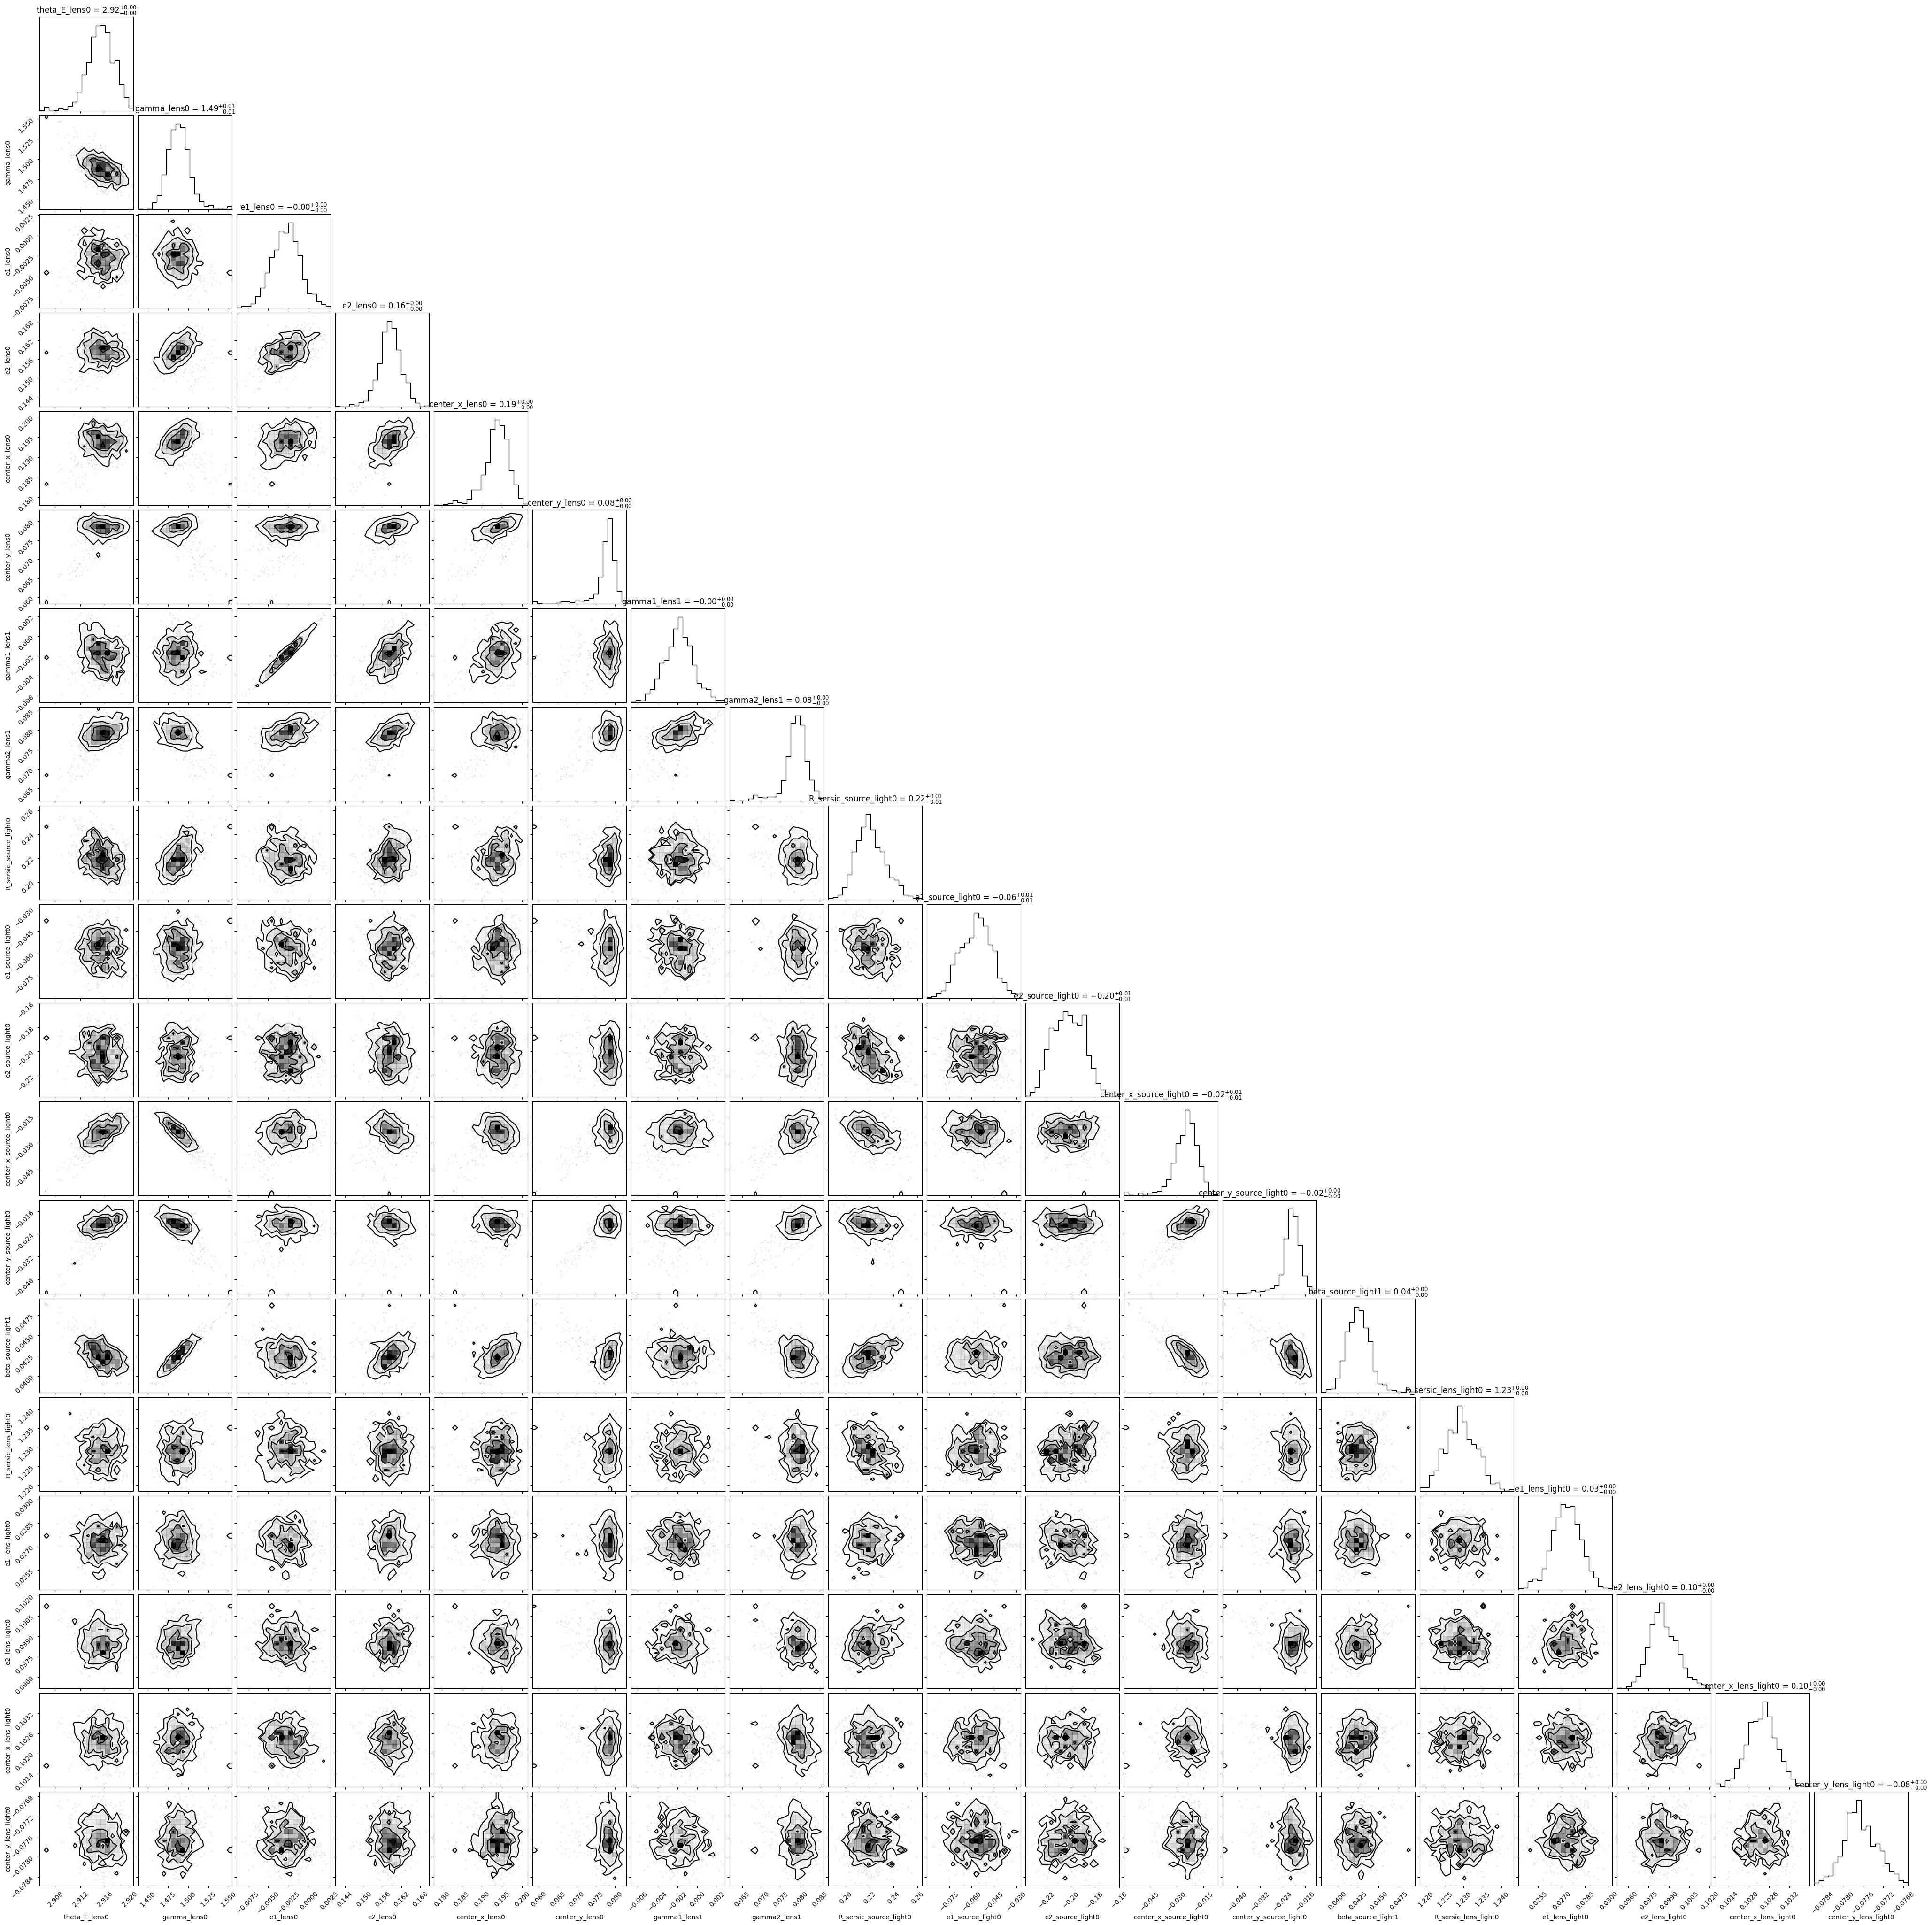

In [14]:
if len(chain_list_mcmc) > 0:
    sampler_type, samples_mcmc, param_mcmc, dist_mcmc = chain_list_mcmc[0]

    param_class = fitting_seq.param_class

    print("Number of non-linear parameters in the MCMC process:", len(param_mcmc))
    print("Parameters in order:", param_mcmc)
    if samples_mcmc is not None:
        print("Number of evaluations in the MCMC process:", np.shape(samples_mcmc)[0])
        n_sample = len(samples_mcmc)
        print(n_sample)
        burnin = 800
        thin = 20
        shortened_samples_mcmc = chain[:, burnin::thin, :].reshape((-1, n_params))
        if not shortened_samples_mcmc == []:
            n, num_param = np.shape(shortened_samples_mcmc)
            print("Shape of samples_mcmc_cut:", shortened_samples_mcmc.shape)
            plot = corner.corner(
                shortened_samples_mcmc, labels=param_mcmc, show_titles=True
            )
    else:
        print("No samples available for corner plot.")
else:
    print("No MCMC chains available.")

## Visualization of the MCMC-run fit:

-0.9479867826644823 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  0.9479867826644761


/opt/conda/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:63: RuntimeWarning: divide by zero encountered in log10
  log_model = np.log10(model)
/opt/conda/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:148: RuntimeWarning: invalid value encountered in log10
  np.log10(self._data),
/opt/conda/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:211: RuntimeWarning: divide by zero encountered in log10
  np.log10(self._model),
/tmp/ipykernel_19/2343327444.py:20: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


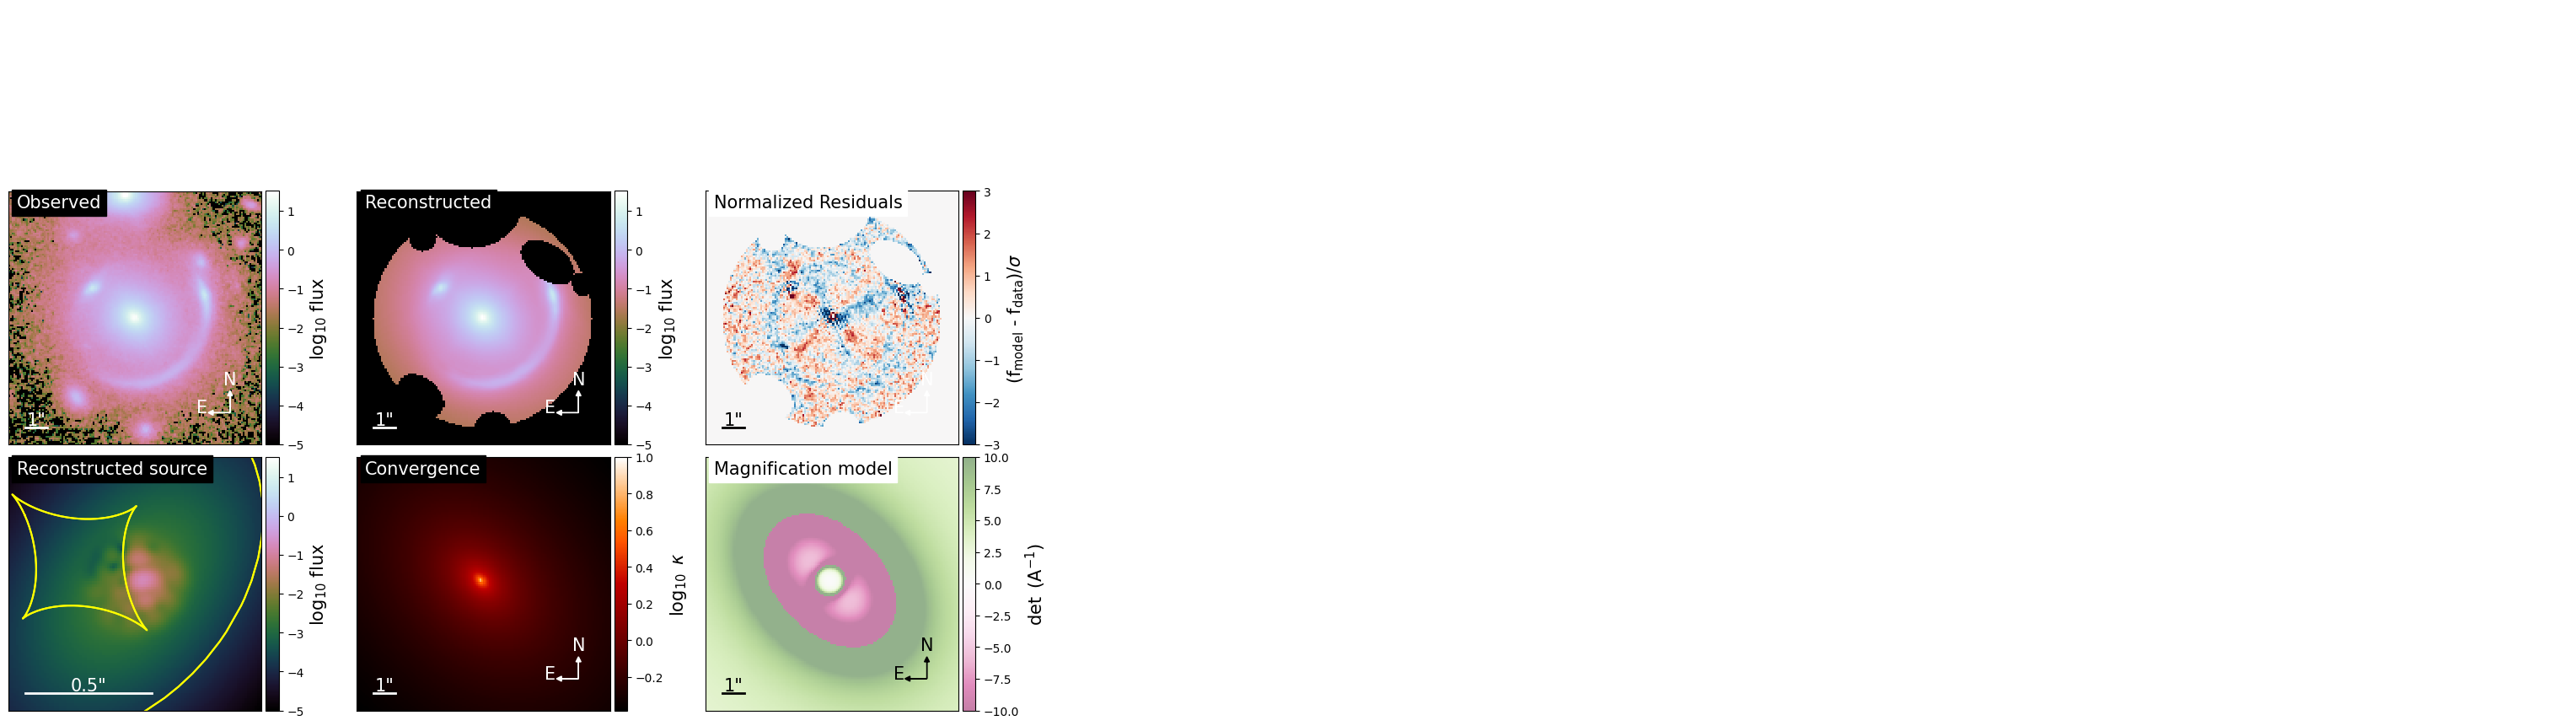

In [15]:
model_plot = ModelPlot(
    multi_band_list,
    kwargs_model,
    kwargs_result_mcmc,
    arrow_size=0.02,
    cmap_string="cubehelix",
    image_likelihood_mask_list=kwargs_likelihood["image_likelihood_mask_list"],
)

f, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=False, sharey=False)

model_plot.data_plot(ax=axes[0, 0])
model_plot.model_plot(ax=axes[0, 1])
model_plot.normalized_residual_plot(ax=axes[0, 2], v_min=-3, v_max=3, cmap="RdBu_r")
model_plot.source_plot(
    ax=axes[1, 0], deltaPix_source=0.01, numPix=100, with_caustics=True, scale_size=0.5
)
model_plot.convergence_plot(ax=axes[1, 1], v_max=1, cmap="gist_heat")
model_plot.magnification_plot(ax=axes[1, 2], cmap="PiYG")
f.tight_layout()
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.0, hspace=0.05)
plt.show()

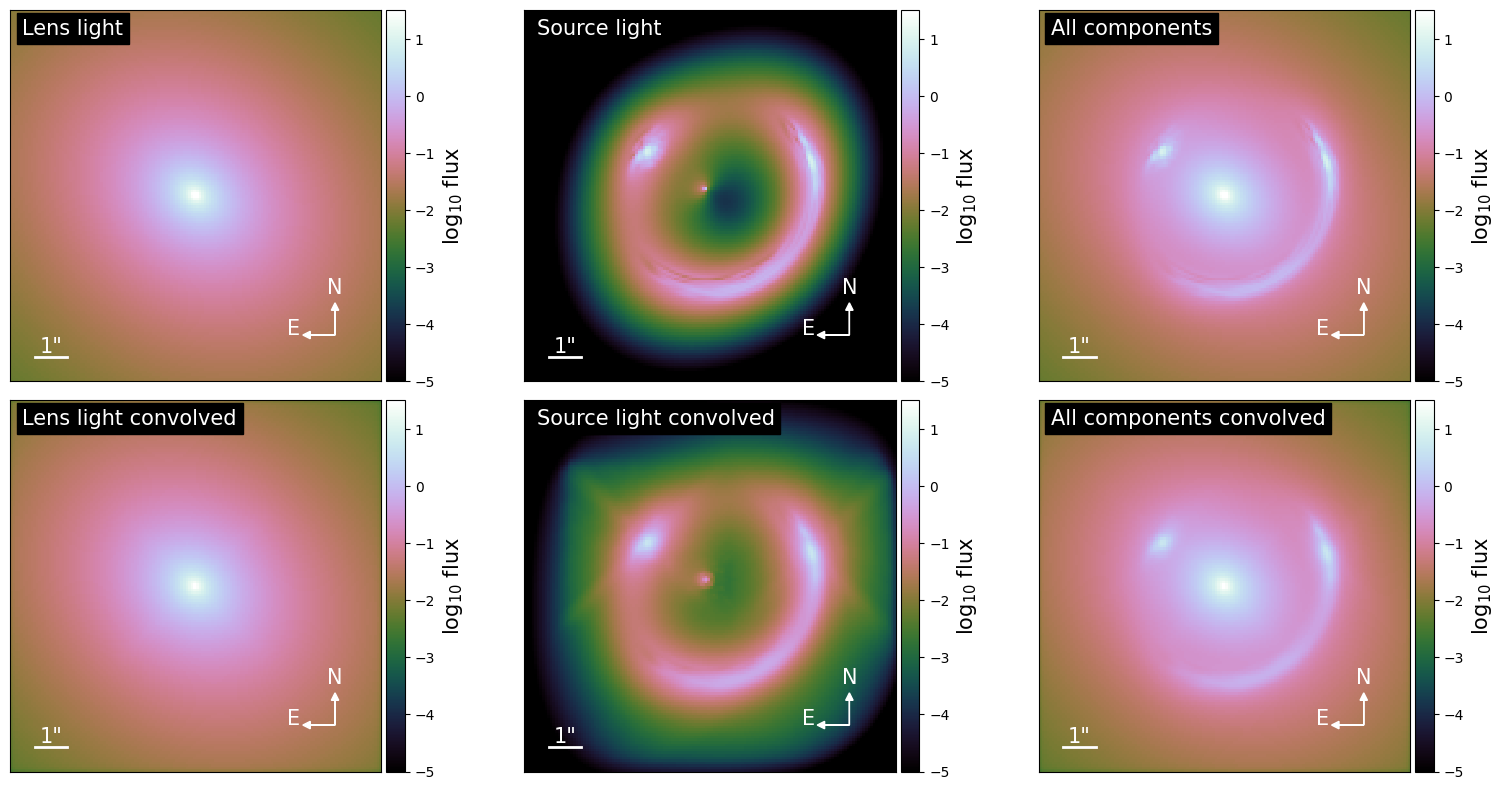

{'kwargs_lens': [{'theta_E': 2.9154891977591286, 'gamma': 1.4992407813847155, 'e1': -0.002800573681359413, 'e2': 0.16153676035188314, 'center_x': 0.1956295683561008, 'center_y': 0.0797059422316627}, {'gamma1': -0.0019129236859211636, 'gamma2': 0.07953095488737602, 'ra_0': 0.0, 'dec_0': 0.0}], 'kwargs_source': [{'amp': 13.727989379000663, 'R_sersic': 0.22096913960221956, 'n_sersic': 1.0, 'e1': -0.05136986339313204, 'e2': -0.20937363520896277, 'center_x': -0.029421855863186276, 'center_y': -0.020508248144781898}, {'amp': array([ 1.44627737e+03, -1.03936536e+03,  3.18356243e+02,  2.61575849e+02,
       -2.55886425e+02,  3.69374370e+01,  1.11330755e+02, -3.95091274e+01,
        1.38517506e+01, -1.32094163e+02,  6.85880385e+01,  5.38943125e+01,
        4.00849807e+01,  1.43719333e+02,  3.15506037e+02, -1.35688985e+02,
        3.69974922e+00, -4.16304892e+01, -9.04078780e+01, -1.14309096e+02,
        2.64761233e+02,  5.37193006e+01, -2.74046963e+01,  1.55816023e+01,
       -3.54064122e+01, -

In [16]:
f, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=False, sharey=False)

model_plot.decomposition_plot(
    ax=axes[0, 0], text="Lens light", lens_light_add=True, unconvolved=True
)
model_plot.decomposition_plot(
    ax=axes[1, 0], text="Lens light convolved", lens_light_add=True
)
model_plot.decomposition_plot(
    ax=axes[0, 1], text="Source light", source_add=True, unconvolved=True
)
model_plot.decomposition_plot(
    ax=axes[1, 1], text="Source light convolved", source_add=True
)
model_plot.decomposition_plot(
    ax=axes[0, 2],
    text="All components",
    source_add=True,
    lens_light_add=True,
    unconvolved=True,
)
model_plot.decomposition_plot(
    ax=axes[1, 2],
    text="All components convolved",
    source_add=True,
    lens_light_add=True,
    point_source_add=True,
)
f.tight_layout()
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.0, hspace=0.05)
plt.show()
print(kwargs_result_mcmc)

## Saving the MCMC-run joblib file:

In [17]:
multi_band_list_out = fitting_seq.multi_band_list
kwargs_fixed_out = fitting_seq.kwargs_fixed

init_samples = 1000  # cannot be 'None' for MCMC

input = [
    fitting_kwargs_list_mcmc,
    multi_band_list,
    kwargs_model,
    kwargs_constraints,
    kwargs_likelihood,
    kwargs_params,
    init_samples,
]

output = [
    kwargs_result_mcmc,
    multi_band_list_out,
    kwargs_fixed_out,
    shortened_samples_mcmc,
    param_mcmc,
]

output_path = "DESIJ1018-0121_mcmc_output.joblib"

with open(output_path, "wb") as f:
    joblib.dump([input, output], f, compress=True)

In [18]:
output = [mean_pos, median_pos, std_pos, q16_pos, q84_pos]

output_path = "mean_median_std_q16_q84.joblib"

with open(output_path, "wb") as f:
    joblib.dump([output], f, compress=True)

## Loading the statistics arrays from the joblib file:

In [19]:
# import joblib
# pl = joblib.load('/kaggle/input/final-deliverables-mcmc-desij1018-0121/DESIJ1018-0121_mcmc_output.joblib')
# #print(pl)
# param_mcmc = pl[1][4]
# print(param_mcmc)
# print(len(pl))

In [20]:
# import joblib
# stat = joblib.load('/kaggle/input/final-deliverables-mcmc-desij1018-0121/mean_median_std_q16_q84.joblib')
# print(stat)

In [21]:
# median_pos = stat[0][1]
# q16_pos = stat[0][3]
# q84_pos = stat[0][4]
# print(median_pos)
# print(q16_pos)
# print(q84_pos)

## yaml file output

In [22]:
# n_params = 19
# last = 1000

In [23]:
# import yaml

# # list of parameters to be included in the yaml file
# list_params = ['theta_E_lens0', 'gamma_lens0',
#                'e1_lens0', 'e2_lens0',
#                'center_x_lens0', 'center_y_lens0',
#                'gamma1_lens1', 'gamma2_lens1',
#                'R_sersic_lens_light0',
#                'e1_lens_light0', 'e2_lens_light0',
#                'center_x_lens_light0', 'center_y_lens_light0'
#               ]

# # values of the parameters from mcmc stored in a 2D array
# values = []
# for i in range(n_params):
#     values.append([median_pos[i][last - 1],
#                    q84_pos[i][last - 1] - median_pos[i][last - 1],
#                    median_pos[i][last - 1] - q16_pos[i][last - 1]])

# # making a dict of mcmc parameters
# param_mcmc_dicts = dict(zip(param_mcmc, values))

# # parameters filtered by list params
# parameter_values = {k: param_mcmc_dicts.get(k) for k in list_params}

# '''
# # marge parameter_values and environment_values
# parameter_values.update(environment_params)
# '''
# # make all the numpy variales to float
# parameter_values = {key: [float(item) for item in value]
#                     if isinstance(value, list) else float(value) for key,
#                     value in parameter_values.items()}

# # Write the dictionary to a YAML file
# yaml_file_name = "DESIJ1018-0121_point_estimates.yml"
# with open(yaml_file_name, 'w') as yaml_file:
#     yaml.dump(parameter_values, yaml_file, default_flow_style=False)
# print(f"YAML file '{yaml_file_name}' created successfully.")

In [24]:
# # Read the YAML file using safe_load
# with open(yaml_file_name, 'r') as file:
#     try:
#         yaml_read = yaml.safe_load(file)
#         print("YAML Data:")
#         print("Number of params:", len(list(yaml_read.keys())))
#         print(yaml_read)
#     except yaml.YAMLError as e:
#         print(f"Error reading YAML file: {e}")